In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
# Ejercicio 1. Extraer las siguentes estadísiticas del conjunto de datos para varias de las varibles disponibles: 
# Utilizando métodos de pandas: media, mediana, moda, máximo y mínimo
# Percentiles 25, 75

In [3]:
#moda

In [4]:
df = pd.read_csv("books.csv")

**Principales estadísticos variables numéricas**

In [5]:
df.dtypes

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object

In [6]:
df_numericas = df[["User Rating", "Reviews", "Price", "Year"]]
df_numericas.head(3)

,User Rating,Reviews,Price,Year
0,4.7,17350,8,2016
1,4.6,2052,22,2011
2,4.7,18979,15,2018


In [46]:
#¿Cual será el libro más vendido dentro de los 50 más vendidos de Amazon?
df['Name'].value_counts()

Publication Manual of the American Psychological Association, 6th Edition       10
StrengthsFinder 2.0                                                              9
Oh, the Places You'll Go!                                                        8
The Very Hungry Caterpillar                                                      7
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change     7
                                                                                ..
Humans of New York : Stories                                                     1
Howard Stern Comes Again                                                         1
Homebody: A Guide to Creating Spaces You Never Want to Leave                     1
Have a Little Faith: A True Story                                                1
Night (Night)                                                                    1
Name: Name, Length: 351, dtype: int64

In [7]:
princ_esta = df.describe()                                                                  
princ_esta
# Elegimos df en vez de df_numericas porque automáticamente describe hace los estadísticos únicamente con las varibles numéricas

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


Aquí encontramos los principales estadísticos de las variables numéricas de nuestro dataset:
- El valor 50% corresponde a la 'Mediana'.
- Observamos que la variable con menos desviación estándar es 'Year'. Esto tiene mucho sentido ya que los datos recogidos en nuestro df tienen un rango de 2009 - 2019, por lo que ya fueron "filtrados" previamente. Así, su dispersión es baja.
- La desviación típica (std) de la variable 'User Rating' es muy cercana a 0. Esto quiere decir que l@s usuari@s han valorado los libros de forma similar. Por lo tanto así también observamos que los percentiles 1 (en la tabla: 25%) y 3 (en la tabla: 75%) y la mediana (en la tabla: 50%) son valores muy semejantes.
- El valor mín de 'Price' es 0. Lo interpretamos como una falta de información/error en el registro del precio del libro o que hubo algún libro gratuito.



**Separamos las variables categóricas**

In [8]:
df.dtypes

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object

In [44]:
df_categoricas = df[["Name", "Author", "Genre"]]
df_categoricas.head()

,Name,Author,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,Non Fiction
1,11/22/63: A Novel,Stephen King,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,Non Fiction
3,1984 (Signet Classics),George Orwell,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,Fiction


In [10]:
df_numericas

,User Rating,Reviews,Price,Year
0,4.7,17350,8,2016
1,4.6,2052,22,2011
2,4.7,18979,15,2018
3,4.7,21424,6,2017
4,4.8,7665,12,2019
...,...,...,...,...
545,4.9,9413,8,2019
546,4.7,14331,8,2016
547,4.7,14331,8,2017
548,4.7,14331,8,2018


In [11]:
##################### CÓMO QUITAR EXPONENTES
# Rango Intercualtílico
q3, q1 = np.percentile(df_numericas, [75,25], axis = 0)
iqr = q3 - q1
iqr     

array([3.000000e-01, 1.319525e+04, 9.000000e+00, 6.000000e+00])

El rango intercuartílico (iqr) es la diferencia entre el cuartil 3 y el cuartil 1.  
- IQR columna "User rating": Observamos que el iqr de la columna "User rating" es 0.3. Con esto, confirmamos lo dicho anteriormente: l@s usuari@s que han valorado los libros lo han hecho de forma similar. Much@s de ell@s han puesto la misma nota a cada libro. Es una medida robusta...
- IQR columna "Reviews": El iqr de la columna 'Reviews' es 13195 (aprox). Interpretamos que al ser un valor tan "dispar" hay unos libros que han recibido muchas opiniones y otros libros muy pocas. 

In [12]:
df_num_sin_rew = df[["User Rating", "Price", "Year"]]

**Boxplot**

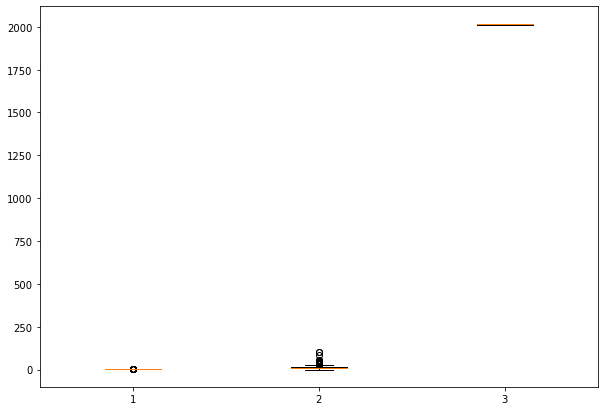

In [13]:
# Boxplot de algunas variables
fig = plt.figure(1, figsize= (10, 7))

ax = fig.add_subplot(111)                       # add_subplot porque tenemos varias columnas y queremos añadirlas todas a la figura.
bp = ax.boxplot(df_num_sin_rew)


Hemos intentando representar nuestras 4 columnas numéricas en un único boxplot pero hemos concluído que no tiene sentido. Las 4 columnas tienen rangos de valores muy diferentes por los que al intentar representarlos al mismo tiempo solo aparecen las columnas con valores muy grandes. Hemos pensado en representar las 4 columnas por separado.

In [24]:
df_numericas.head(1)

,User Rating,Reviews,Price,Year
0,4.7,17350,8,2016


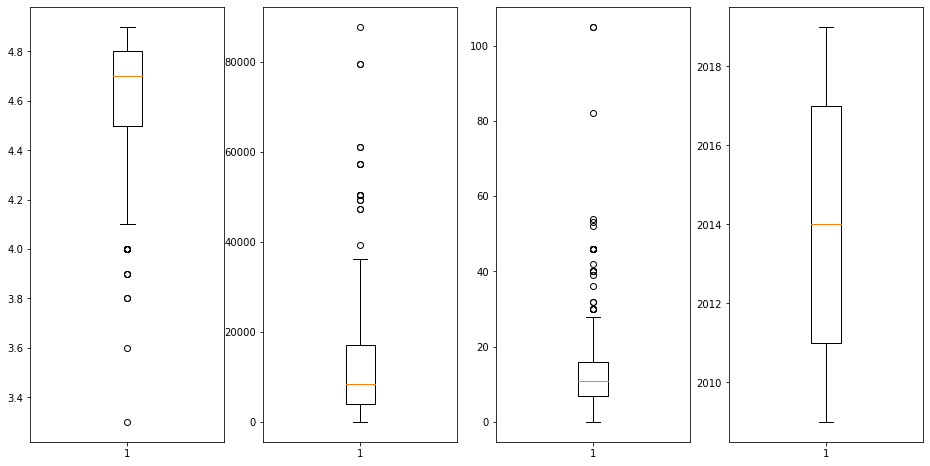

In [43]:
fig,ax = plt.subplots(1,4, figsize = (16,8))

caja_1 = df_numericas.loc[:,'User Rating']
caja_2 = df_numericas.loc[:,'Reviews']
caja_3 = df_numericas.loc[:,'Price']
caja_4 =  df_numericas.loc[:,'Year']

ax[0].boxplot(caja_1)
ax[1].boxplot(caja_2)
ax[2].boxplot(caja_3)
ax[3].boxplot(caja_4)

plt.show()


De esta forma vemos con más claridad los datos de cada tabla numérica de nuestro DF. Donde:
- Observamos que las columnas de User Rating, Reviews y Price contienen muchos outliers, es decir, valores atípicos o anormales ya que se encuentran fuera de los "bigotes" de la caja. Esto no siempre es malo. Algunos pueden ser importantes y otros solo ruido.
- Tendremos que estudiarlos para saber si son susceptibles de eliminar del DF.
- En cambio la columna 'Price' no tiene ningún outlier, ya que los años están dentro de un rango específico. Si tuvieramos alguno seguramente sería descartable.

**Tabla frecuencias**

- Varibles cuantitativas

In [71]:
frec_num = df_numericas.groupby('Price')
frec_price = frec_num.agg(frecuencia = ('Price', 'count'))
frec_price.head()

,frecuencia
Price,
0,12
1,1
2,5
3,1
4,32


In [62]:
frec_price.tail()

,frecuencia
Price,
52,1
53,1
54,1
82,1
105,2


- Hemos agrupado por 'Price' que tiene un rango de 0 a 105 como vimos anteriormente con el método describe(). 
- Con esto calculamos cuantos de nuestros libros tienen cada uno de los precios. 
- Así en el output observamos que hay 12 libros gratuitos, es decir 0. Y el libro más caro (105) aparecen 2.

- Variable cualitativa

In [70]:
frec_cat = df_categoricas.groupby('Genre')
frec_genre = frec_cat.agg(frecuencia = ('Genre', 'count'))
frec_genre.head()

,frecuencia
Genre,
Fiction,240
Non Fiction,310


- Podemos observar que nuestro DF solo tiene dos géneros en toda la lista de libros.
- Vemos que *Non Fiction* tienen más éxito de ventas que los de *Fiction*. 

In [47]:
df.head(2)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction


- Frecuencia acumulada

In [77]:
df_numericas["Price_groupby"] = pd.cut(df_numericas["Price"], bins=5)

frec_num = df_numericas.groupby('Price_groupby')
frec_price = frec_num.agg(frecuencia = ('Price', 'count'))

frec_price["frecuencia_acumulada"] = frec_price["frecuencia"].cumsum()
frec_price.head()

/tmp/ipykernel_35257/3539807039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numericas["Price_groupby"] = pd.cut(df_numericas["Price"], bins=5)


,frecuencia,frecuencia_acumulada
Price_groupby,,
"(-0.105, 21.0]",491,491
"(21.0, 42.0]",43,534
"(42.0, 63.0]",13,547
"(63.0, 84.0]",1,548
"(84.0, 105.0]",2,550
